<a href="https://colab.research.google.com/github/RoetGer/applied-causality-booklet/blob/main/causality_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Causality in Data Science

---



In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from graphviz import Digraph

plt.rc('figure', figsize=(15, 10))

## Association vs Causality

A first important milestone in understanding on how causality affects us as data scientists is to acknowledge the difference between association and causality. Or to put it more concisely: "Correlation does not imply causation".

Let's look at some data:

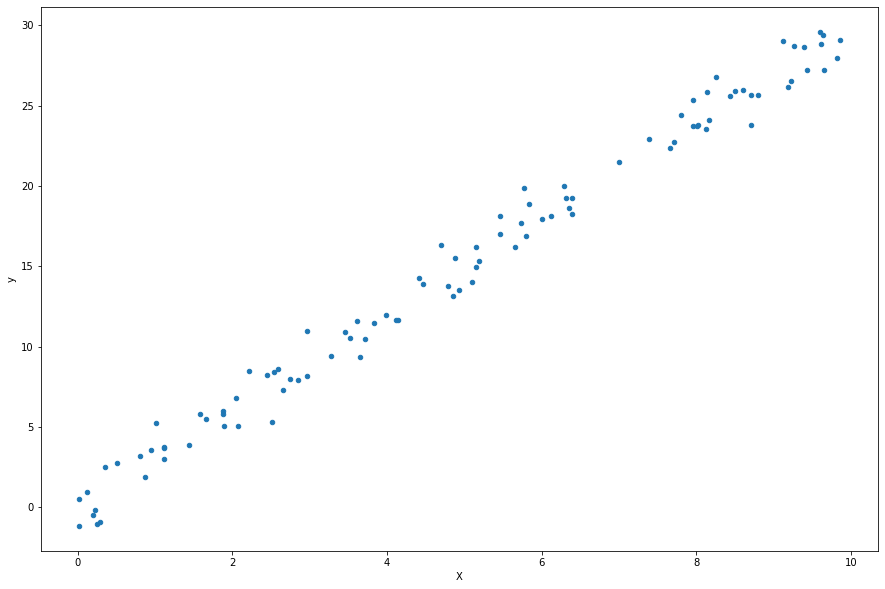

In [23]:
def get_data(effect_size, seed=5):
  np.random.seed(seed)

  x = np.random.uniform(high=10., size=100)
  y = effect_size*x + np.random.normal(size=100)

  return pd.DataFrame({
      'X': x,
      'y': y
  })

data = get_data(effect_size=3.)
data.plot.scatter('X', 'y');

In [22]:
mdl = sm.OLS(endog=data.y, exog=data.X).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.770e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                   5.11e-123
Time:                        21:50:31   Log-Likelihood:                         -145.55
No. Observations:                 100   AIC:                                      293.1
Df Residuals:                      99   BIC:                                      295.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              3.0030      0.018    166.431      0.000       2.967       3.039
==============================================================================
Omnibus:                        0.710   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.829
Skew:                           0.125   Prob(JB):                        0.661
Kurtosis:                       2.630   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
mdl = sm.OLS(endog=data.y, exog=data.X).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.770e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                   5.11e-123
Time:                        21:49:52   Log-Likelihood:                         -145.55
No. Observations:                 100   AIC:                                      293.1
Df Residuals:                      99   BIC:                                      295.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              3.0030      0.018    166.431      0.000       2.967       3.039
==============================================================================
Omnibus:                        0.710   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.829
Skew:                           0.125   Prob(JB):                        0.661
Kurtosis:                       2.630   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the sampled dataset it is easy to recover the relationship between X and y. However, we implicitly assumed that y depends on X, although this was not stated anywhere, we could have also regressed X on y, i.e.:

In [24]:
mdl = sm.OLS(endog=data.X, exog=data.y).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      X   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.770e+04
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                   5.11e-123
Time:                        21:57:13   Log-Likelihood:                         -35.411
No. Observations:                 100   AIC:                                      72.82
Df Residuals:                      99   BIC:                                      75.43
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3318      0.002    166.431      0.000       0.328       0.336
==============================================================================
Omnibus:                        0.719   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.837
Skew:                          -0.126   Prob(JB):                        0.658
Kurtosis:                       2.629   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""